# Tasks:

### 1) Load data from Binance: https://www.binance.com/en/landing/data:

![Load klines](attachment/load_klines.png)

### 2) Calculate and plot indicators:

1. Moving average (MA)
2. Smoothed moving average (SMA)
3. Relative strength index (RSI)
3. Others (long short ratio, open interest, spot-futures spread...)

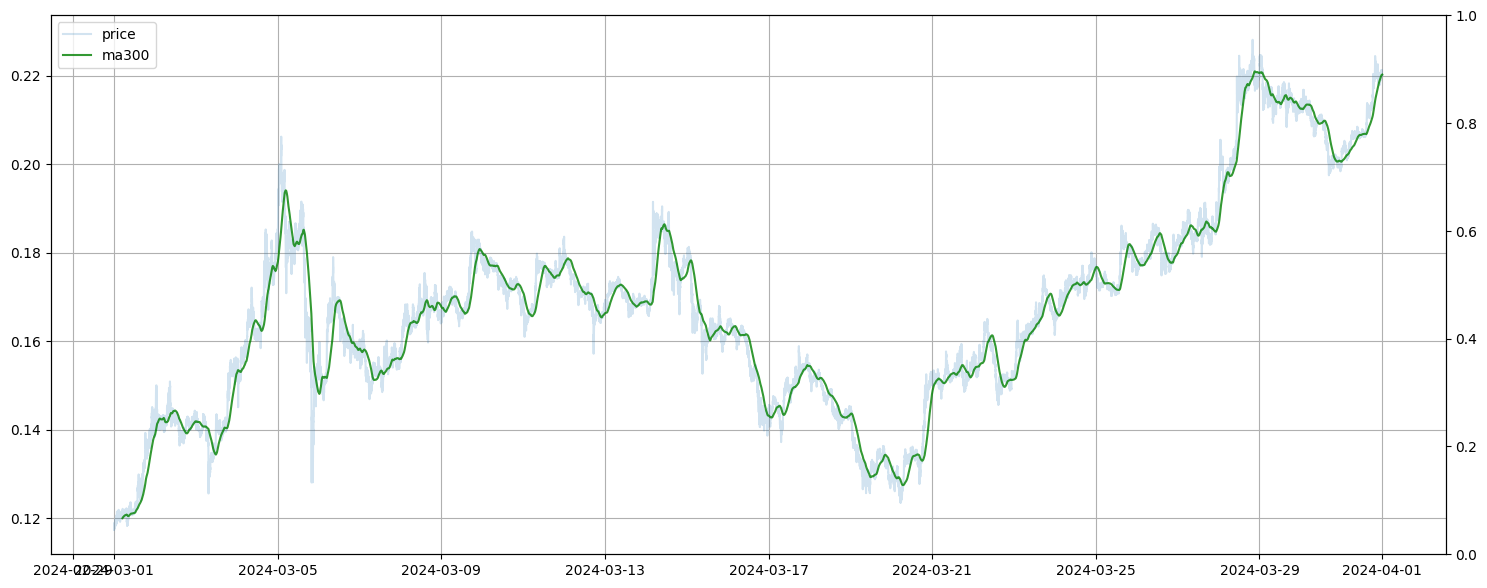

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# read data
data = pd.read_csv('data/DOGEUSDT-1m-2024-03.csv')
data['time'] = pd.to_datetime(data['open_time'], unit = 'ms')

fig, ax = plt.subplots(figsize = (18,7))
ax2 = ax.twinx()

# plot price(close) values
ax.plot(data['time'], data['close'], alpha = 0.2)
# plot MA(300) indicator
ax.plot(data['time'], data['close'].rolling(300).mean(), c = 'green', alpha = 0.8)
ax.grid(True)
ax.legend(['price', 'ma300'])


### 3) Using historical market data and copytrader trades try to find strategy:
https://www.binance.com/en/copy-trading/lead-details/3838699803249970688

https://www.binance.com/en/copy-trading/lead-details/3871399360910422273

In [6]:
copytrader_1_trades = pd.read_csv('copytrader_data/trades_3838699803249970688.csv')
copytrader_2_trades = pd.read_csv('copytrader_data/trades_3871399360910422273.csv')

copytrader_1_positions = pd.read_csv('copytrader_data/positions_3838699803249970688.csv')
copytrader_2_positions = pd.read_csv('copytrader_data/positions_3871399360910422273.csv')
copytrader_1_positions['time'] = pd.to_datetime(copytrader_1_positions['opened'], unit = 'ms')

copytrader_1_positions.head(10)

,Unnamed: 0,id,symbol,type,opened,closed,avgCost,avgClosePrice,closingPnl,maxOpenInterest,closedVolume,isolated,side,status,updateTime,time
0,0,32052019,DOGEUSDT,UM,1713963379617,1714061366315,0.150943,0.151808,25.964,30000.0,30000.0,Cross,Long,All Closed,1714061366911,2024-04-24 12:56:19.617
1,1,32048356,DOGEUSDT,UM,1713961901702,1713962747612,0.162300,0.161480,0.492,600.0,600.0,Cross,Short,All Closed,1713962748811,2024-04-24 12:31:41.702
2,2,32037870,DOGEUSDT,UM,1713958083189,1713960801665,0.162985,0.162170,0.978,1200.0,1200.0,Cross,Short,All Closed,1713960801842,2024-04-24 11:28:03.189
3,3,32021940,DOGEUSDT,UM,1713949735226,1713957974051,0.161230,0.162040,0.486,600.0,600.0,Cross,Long,All Closed,1713957974218,2024-04-24 09:08:55.226
4,4,32017415,DOGEUSDT,UM,1713947418830,1713949386118,0.162240,0.161380,0.516,600.0,600.0,Cross,Short,All Closed,1713949386270,2024-04-24 08:30:18.830
5,5,32001644,DOGEUSDT,UM,1713938731359,1713943167941,0.161300,0.162120,0.492,600.0,600.0,Cross,Long,All Closed,1713943168120,2024-04-24 06:05:31.359
6,6,31990503,DOGEUSDT,UM,1713934096547,1713936854302,0.162500,0.161680,0.492,600.0,600.0,Cross,Short,All Closed,1713936854618,2024-04-24 04:48:16.547
7,7,31974019,DOGEUSDT,UM,1713928827457,1713932187869,0.162875,0.162060,0.978,1200.0,1200.0,Cross,Short,All Closed,1713933902630,2024-04-24 03:20:27.457
8,8,31967941,DOGEUSDT,UM,1713925390282,1713925819734,0.161850,0.160950,0.360,400.0,400.0,Cross,Short,All Closed,1713933837319,2024-04-24 02:23:10.282
9,9,31962903,DOGEUSDT,UM,1713922658316,1713923415148,0.162670,0.161780,0.445,500.0,500.0,Cross,Short,All Closed,1713933831303,2024-04-24 01:37:38.316


In [3]:
# here you can try to guess how each bots traded and create your own strategy
# we give an example with demanded metrics on deals of first bot

# just like example
total_balace_on_account = 4000

#income in %
incomes = copytrader_1_positions.closingPnl/total_balace_on_account*100

In [4]:
import numpy as np

iterest_rate = 0
sharp_ratio = (incomes.mean() - iterest_rate)/incomes.std()
print('sharp ratio', round(sharp_ratio, 2))

print(f'win rates {round((incomes > 0).sum()/len(incomes) *100, 2)}%')

print(f'total profit {round(incomes.sum(), 3)}%')


print('others')
incomes.mean(), incomes.std(), pd.Series(incomes).quantile(0.25)

sharp ratio 0.02
win rates 99.84%
total profit 23.296%
others


(0.012260928199868421, 0.7132975643900775, 0.005999999999999999)

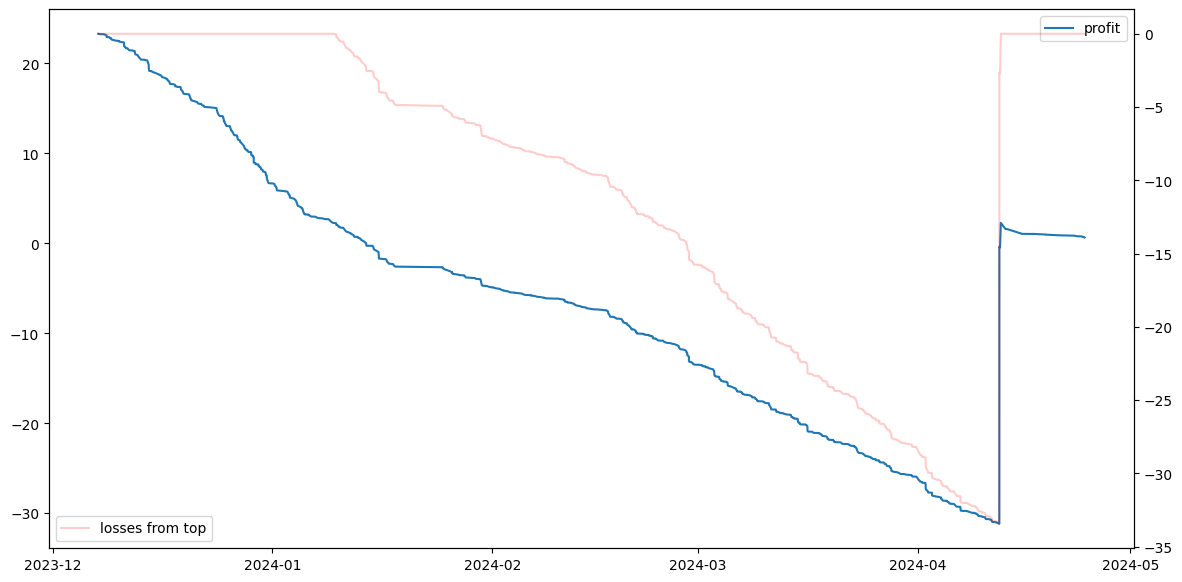

In [7]:
fig, ax = plt.subplots(figsize = (14,7))

#income profit
ax.plot(copytrader_1_positions['time'], incomes.cumsum())

#draw down
ax2 = ax.twinx()
ax2.plot(copytrader_1_positions['time'], incomes.cumsum() - pd.Series(incomes.cumsum()).cummax(), c = 'red', alpha = 0.2)

ax.legend(['profit'])
ax2.legend(['losses from top'])